<a href="https://colab.research.google.com/github/luislauriano/Data_Science/blob/master/Projeto_construcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Esse projeto ainda está sendo construido, esse notebook é um rascunho do projeto. Abraço!

# **Dicas do Meigarom (YTB)** 

Luis, vamos lá então.

* O projeto que eu mais gostei foi o de Detecção de Cancer de Mama.
* Para resolve qualquer projeto de ML você precisa de 10 passos e você fez 5 deles. Conferir os passos de um projeto de ML novamente
* Gostei das suas explicações depois de cada código.
* Você poderia ter feito uma análise estatística descritiva dos dados, para dar um visão geral dos dados, em termos de métricas estatísticas ( média, mediana, std, moda, … )
* Você poderia ter feito mais análise exploratória de dados. Quais as features mais importantes para o modelo? Qual o impacto de cada feature na variável resposta?
* Você poderia explicar porque usou StandardScaler nas Features. Porque padronizar os dados? O que isso ajuda no modelo?
* Porque você usou LabelEncoder na variável resposta? O que isso traz de benefício?
* Poderia explicar, porque voce usou Random Forest. Qual o motivo da sua escolha?
* Explicar mais sobre as métricas, o que significa cada métrica? Qual das métricas eu deveria olhar? Todas? Apenas Uma?
13h52
* Vai se aprofundando nos projetos e procurando responder porque você está colocando cada coisa. Porque Random forest? Porque Analise Exploratoria? Porque StandarScaler? Para que serve a matrix de correlação?
* Vai fazendo testes e tentando entender o real motivo de cada linha código que você coloca, e porque essa linha é importante e no que ela ajuda?

# **Projetos como base:**

### Projeto do Rafael
https://github.com/barbosarafael/Projetos/blob/master/iNeuron_Back_order_prediction_Notebook/hackaton_ineuron_back_order_prediction.ipynb

### Projeto do Carlos Melo
https://github.com/carlosfab/data_science/blob/master/Setembro_Amarelo.ipynb

### Projeto do Cancer de Mama 
https://github.com/luislauriano/Data_Science/blob/master/Machine_Learning_para_Detec%C3%A7%C3%A3o_do_C%C3%A2ncer_de_Mama.ipynb

#**Referencias:**

Limpeza e preparação dos dados: https://medium.com/@lucasoliveiras/limpeza-e-prepara%C3%A7%C3%A3o-dos-dados-com-pandas-856e844abfbb

Tutorial API do Spotify: https://dandaramcsousa.github.io/2020/05/20/tutorial-api-spotify.html

Escrever e detalhar o maximo e tudo possivel com calma. (Isso também vai ser importante para aprender)   

Explicar cada coisa usada como quando eu for usar o sklearn (para isso vou precisar pesquisar sobre metric score, acuracia e etc para falar sobre)

___________________________________________________________________________________________________


# **Spotify & Python & Data Science (Da coleta de dados do Spotify ao Deploy)**

## **Objetivo do projeto:**

O objetivo desse projeto é que seja feita uma análise de dados dos albúmns do spotify do artista NexoAnexo, passando pelas principais etapas de uma análise de dados. Coleta dos dados, pre-processamento, exploração e visualização dos dados. Por fim, construindo uma aplicação/dashboard com Python, após isso a aplicação será colocada em produção com o heroku. 

Um outro objetivo é que a partir das conclusões feitas da análise dos dados das músicas dos albúmns, seja identificado fatores que ajudam um albúm,música a ter sucesso e como isso pode ser usado para futuros lançamentos.

## **Etapas do projeto**

* Coleta do dados 
   1. Api do spotify
   2. Dicionario dos dados
   3. Importar os pacotes e dataset necessários
   4. Leitura do arquivo

* Limpeza e preparação dos dados
    1. Deletar colunas
    2. Renomear colunas 
    3. Verificar os tipos das colunas
    4. Alterar os tipos de colunas 
    5. Verificar dados ausentes
    6. Preencher dados ausentes
    7. Corrigindo dados divergentes
    8. Verificando valores duplicados
    9. Outliers
  
* Exploração e visualização dos dados 
* Aplicação/Dashboard com python + Deploy com Heroku

## **Coleta dos dados**



A coleta de dados é a primeira etapa de todo projeto de Data Science, caso seja optado por não coletar um conjunto de dados já pronto, devemos procurar fontes de dados que possam ser uteis para construir nossa base de dados e das fontes extrair os dados.

Uma das formas mais famosas de coletar dados já prontos para realizar projetos é buscando em fontes confiaveis como kaggle ou portais governamentais, entretanto, o que queremos são dados que dificilmente encontrariamos na internet, além de se tratar de dados de um artista especifico, ainda assim é um artista que não possui grande popularidade.

A primeira alternativa de coletarmos os dados seria fazendo o uso de web scraping, web scraping como o proprio nome já diz, é a coleta de dados web, ou raspagem web, sendo uma forma de mineração que permite a extração de dados de sites da web, convertendo-os em informação estruturada para posterior análise. Porém, com meu pouco conhecimento em web scraping, não sei se seria possivel coletar os dados do site do spotify.  
Por outro lado, temos uma seguda e mais viavel alternativa, apesar de não ser tão conhecida, o spotify possui uma API onde podemos encontrar e usar os dados de todos os artistas cadastrados no spotify, até mesmo dentro da API é possivel criar dashboards e fazer análises. Mas não é isso que queremos, o que de fato queremos é trabalhar e manipular os dados externamente, para podermos fazer nossas análises com as bibliotecas do python. Como queremos analisar os dados com python, nada melhor que coletar os dados da API do spotify com o próprio python, através da biblioteca spotipy. 

A biblioteca Spotipy tem o objetivo de .... Com a biblioteca spotipy é possivel... isso e outras formas de utilizar a bilioteca você pode encontrar na documentação da biblioteca.

### **Coletar os dados da API do Spotify com a biblioteca Spotipy**

1. Coletar as informações de um artista, dado um nome;
2. Coletar os ids e nomes de todos os álbuns de um artista;
3. Coletar informações de todas as músicas de um álbum;
4. Coletar informações de todas as músicas de todos os álbuns de um artista;
5. Converter tudo para um csv.


In [114]:
!pip install spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
import csv
 
sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id="dcffc14978ed497aa58834a7864a99b7", client_secret="e8c5cc78c8e74ccd92323d146c635b47"))

In [115]:
def get_artist(name):
    results = sp.search(name)
    items = results['tracks']['items']
    if len(items) > 0:
        return items[0]['artists'][0]
    else:
        return None

In [116]:
def get_artist_id(artist):
    return artist['id']

In [117]:
def get_artist_albums_id_names(id):
  albums = sp.artist_albums(id, country = 'BR', limit=3)
  albums_id_name = {}
  for i in range(len(albums['items'])):
    id = albums['items'][i]['id']
    name = albums['items'][i]['name']
    albums_id_name[id] = name
 
  return albums_id_name

Determinei o limit 3, tendo em vista que Nexo tem 3 albumns, se quisessemos visualizar as outras músicas poderiamos aumentar esse limit para 50, total de musicas que ele possui no spotify.

In [118]:
def get_album_songs(album_id, album_name):
  spotify_album = {}
 
  tracks = sp.album_tracks(album_id)
  
  for n in range(len(tracks['items'])):
    id_track = tracks['items'][n]['id']
    track = sp.track(id_track)
    spotify_album[id_track] = {}
    
    spotify_album[id_track]['album'] = album_name
    spotify_album[id_track]['album_type'] = track['album']['album_type']
    spotify_album[id_track]['track_number'] = track['track_number']
    spotify_album[id_track]['id_track'] = track['id']
    spotify_album[id_track]['name'] = track['name']
    spotify_album[id_track]['popularity'] = track['popularity']
    spotify_album[id_track]['explicit'] = track['explicit']
    spotify_album[id_track]['duration_ms'] = track['duration_ms']
    spotify_album[id_track]['release_date'] = track['album']['release_date']
 
    artists_track = track['artists']
    spotify_album[id_track]['artists'] = []
    for artist in artists_track:
      spotify_album[id_track]['artists'].append(artist['name'])
  return spotify_album


In [119]:
def get_all_albums_songs(albums_ids_names):
  spotify_albums = []
  albums_names = []
  for id, name in albums_ids_names.items():
    if name not in albums_names:
      albums_names.append(name)
      album_songs = get_album_songs(id,name) 
    for item in album_songs.items():
      spotify_albums.append(item[1]) 
  return spotify_albums

In [120]:
def convert_to_csv(filepath, name):
  keys = filepath[0].keys()
  print(keys)
  csv_name = ''+ name + '.csv'
  with open(csv_name, 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(filepath)
  return

In [121]:
name = "NexoAnexo"
artist = get_artist(name)    
if artist:
  artist_id = get_artist_id(artist)
  albums_id_names = get_artist_albums_id_names(artist_id)
  all_albums = get_all_albums_songs(albums_id_names)
  convert_to_csv(all_albums, 'NexoAnexo')   
else:
  logger.error("Can't find artist: %s", artist)

dict_keys(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity', 'explicit', 'duration_ms', 'release_date', 'artists'])


Como a popularidade das músicas podem alterar diariamente, para não interferir na análise, era preciso utilizar um conjunto de dados de um dia especifico, por isso motivo foi utilizado o conjunto de dados do dia X/X/X.

### **Dicionario dos dados**

Algumas coisas precisam ser definidas para que a análise fique clara e todos possam entender, então:

O Spotify disponibiliza a popularidade de uma faixa, então obviamente usaremos a popularidade da faixa como uma de nossas variaveis para análise, mas como é feito o cálculo da populariade?. O cálculo da popularidade é feito pelo número de ouvintes daquela música e que na API é definida assim:

*Popularidade da faixa: O valor estará entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada e baseia-se na maior parte no número total de reproduções que a faixa teve e quão recentes foram estas reproduções. Logo, as músicas que estão sendo tocadas com uma maior frequência atualmente terão uma popularidade maior do que as músicas que foram muito tocadas no passado.*

Lembre-se disso, vai ser muito importante pra nossa análise.

Para conseguir a popularidade de um álbum e de uma musica, defini que o cálculo da mediana da popularidade de todas as músicas do álbum seria ideal. A média é muito afetada por valores extremos e a mediana, não. 



**Informações sobre as variáveis**


É importante saber o que cada variável (coluna) significa e a importância delas para o conjunto de dados, para ter um entendimento inicial dos dados. Se o conjunto de dados for da web, normalmente deve ter allguma descrição no site, caso seja um conjunto de dados da empresa, é importante conversar com o pessoal da área de negocios, que normalmente são os que tem um maior entendimento do conjunto de dados. Também não pode ficar de fora uma conversa com alguém especialista no assunto que envolve o conjunto de dados, tendo em vista que é preciso além de entender os dados, entender o meio em que os dados estão envolvidos, para se construir hipoteses e tirar conclusões. 

Como eu mesmo fui o responsável por coletar esse conjunto de dados, não encontrei nenhuma informação disponivel sobre as variaveis, porém, o meu entendimento como usuario do spotify foi util o bastante para entender e criar hipoteses sobre o conjunto de dados, além de conhecer, entender e acompanhar as músicas do artista NexoAnexo.

* album = Os albuns 
* album_type = Música ou Albúm (Como coletamos os dados dos albuns, o tipo é album)
* track_number = Posição da música no albúm
* id_track = ID da música no Spotify
* name = Nome da música
* popularity = Popularidade da música
* explicit = A música é explicita ou não
* duration_ms  = Duração da música
* release_date = Data de Lançamento da música
* artists = Nome do artista responsavel pela música


### **Importar os pacotes e datasets necessário**



As bibliotecas que foram utilizadas são as bibliotecas consideradas essenciais para uma análise de dados, sendo Pandas a principal delas, tendo em vista a necessidade de manipular os dados.

In [122]:
#importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# configurar o notebook
sns.set_style('whitegrid');

### **Leitura do arquivo**

Antes de tudo, deve ser feita uma leitura do arquivo que será utilizado, retirando algumas informações básicas, como: "Como os dados estão separados?", "Qual o tamanho do arquivo", "Quantos registros possuem?", "Vai demorar para o Google colab ler o arquivo?". Essas perguntas são importantes para quando necessario importar o conjunto de dados com o Pandas.

Abrindo o arquivo NexoAnexo.csv, obviamente, foi possivel identificar que se trata de um arquivo no formato CSV, os dados estão separados por "," e o conjunto possue 34 linhas, ou seja, se trata de um conjunto de dados pequeno e o Google colab não terá muitos problemas para ler o arquivo.

In [166]:
#Importando o conjunto de dados NexoAnexo
df = pd.read_csv('NexoAnexo (1).csv', sep=',')

Em alguns casos reais, onde é trabalhado com conjuntos de dados maiores e conseguentemente mais pesados, essa etapa de importar os dados pode ser mais trabalhosa, por exigir outros parametros, como header, skiprows, skipfooter, delimiter e entre outros, para que a importação do conjunto de dados ocorra.

Como antes mesmo de importar o conjunto de dados, foi feita uma leitura, eu sei que o conjunto de dados possue 33 linhas, porém, será que a leitura dos dados foi corretamente? Então o primeiro entendimento dos dados será quantas linhas e colunas o conjunto de dados possue.

In [167]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {df.shape[0]}')
print(f'Número de entradas ou colunas {df.shape[1]}')

Número de linhas ou variaveis 33
Número de entradas ou colunas 10


Se observado, a leitura dos dados foi feita de maneira correta e agora sabemos que o conjunto de dados possue 33 linhas ou variaveis e 10 entradas ou colunas. Por mais que pareça algo simples e insignificante, essas informações dão uma noção e entendimento importante para as proximas etapas, como a etapa de deletar colunas ou dados que não serão usados na análise.

## **Limpeza e preparação dos dados**

A etapa de pre-processamento dos dados ou limpeza e preparação dos dados é uma das mais importantes de todo projeto de Data Science ou Machine Learning. Nessa etapa, os dados precisam ser manipulados e tratados, sendo a biblioteca Pandas a principal por desempenhar esse papel, a etapa se dá de forma continua, podendo acontecer durante todo o projeto e não apenas em sua fase especifica, também é a etapa que mais demanda tempo do cientista ou analista de dados, "será que a demanda maior de tempo seja por se tratar da mais importante?". O pre-processamento de dados envolve muito tratamento dos dados e nem tudo será visto nesse projeto. 


O pre-processamento de dados...

### **Deletando colunas**

Como o nosso conjunto de dados contém colunas que não serão uteis para o que desejamos fazer, vamos deletar...

In [125]:
df.columns

Index(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity',
       'explicit', 'duration_ms', 'release_date', 'artists'],
      dtype='object')

In [126]:
df.head()

,album,album_type,track_number,id_track,name,popularity,explicit,duration_ms,release_date,artists
0,Trap from Future,album,1,6Mx214YlNnbj7un9PrvmGi,Vem No Tum Tum,17,True,216917,2020-03-13,['NexoAnexo']
1,Trap from Future,album,2,1xOs8YJkkKm5HhRiP1ha4g,Drip Know Me,3,True,154646,2020-03-13,"['NexoAnexo', 'Drippy Kid Jay']"
2,Trap from Future,album,3,4s4G0Z6mSkrauIvBXRlVHk,Match,4,True,180716,2020-03-13,['NexoAnexo']
3,Trap from Future,album,4,5C1iQCV3xuc0oHQpe7fhhQ,Trap & Brega,6,True,164468,2020-03-13,['NexoAnexo']
4,Trap from Future,album,5,3H2TfCpxaSfEh5nVbcDzrp,Marca Sem Roupa,6,True,148364,2020-03-13,"['NexoAnexo', 'Victor KR']"


Vamos deletar as colunas...Isso é importante porque..

In [127]:
df.columns.unique()

Index(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity',
       'explicit', 'duration_ms', 'release_date', 'artists'],
      dtype='object')

Dessa forma consigo ter uma visão de todas as minhas colunas, então agora é so dar um CTRL + C nas que desejo e inserir no proximo método 

In [128]:
df = df[['album', 'name', 'track_number', 'popularity', 'duration_ms']].copy()

Costumo deletar as colunas dessa maneira por que me permite escolher uma nova ordem para as colunas, além de não delatarem proprimamente as outras colunas que foram descartadas.

In [129]:
df.columns

Index(['album', 'name', 'track_number', 'popularity', 'duration_ms'], dtype='object')

### **Renomeando colunas**

A renomeação das colunas é importante pq...contexto

In [130]:
df.columns

Index(['album', 'name', 'track_number', 'popularity', 'duration_ms'], dtype='object')

Para renomear todas as colunas vou utilizar o metodo df.columns...

In [131]:
df.columns = ['nome_do_album', 'nome_da_faixa',  'posicao_da_faixa', 'popularidade', 'duraçao_da_musica']

Quando o objetivo é renomear uma ou mais colunas, o metodo df.rename seria melhor...

In [132]:
df.head(3)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
0,Trap from Future,Vem No Tum Tum,1,17,216917
1,Trap from Future,Drip Know Me,2,3,154646
2,Trap from Future,Match,3,4,180716


contexto

### **Verificar dados ausentes**

contexto

In [133]:
df.isna().sum()

nome_do_album        0
nome_da_faixa        0
posicao_da_faixa     0
popularidade         0
duraçao_da_musica    0
dtype: int64

Deve-se ficar atento pois muita das vezes uma coluna pode ter o registro de dados, ou seja, é informado pelo método que o conjunto de dados não possui valores nulos, entranto, esses dados não passam nenhuma informação util 

Também poderia fazer o uso do isnull, porém recomento utilizar o isna, devido que o final  do método "na", remete ao dropna, fillna e etc... Que são metodos que também trabalham de alguma forma com dados ausentes. 

Vamos usar um "df.head(10) e df.tail(10)", pra analisar com calma os 10 primeiros e ultimos registros, averiguando se os dados realmente passam alguma informação, já que não temos dados ausentes.

In [134]:
df.head(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
0,Trap from Future,Vem No Tum Tum,1,17,216917
1,Trap from Future,Drip Know Me,2,3,154646
2,Trap from Future,Match,3,4,180716
3,Trap from Future,Trap & Brega,4,6,164468
4,Trap from Future,Marca Sem Roupa,5,6,148364
5,Trap from Future,Wow!,6,3,145675
6,Trap from Future,Não Posso Morrer Novo,7,3,150116
7,Trap from Future,Fuck Cópias,8,2,140880
8,Trap from Future,Passa Nada,9,3,135745
9,Trap from Future,Novo Rock,10,1,130971


In [135]:
df.tail(10)

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
23,Trap de Cria Mixtape,Isso Que É Foda,9,4,135086
24,Trap de Cria Mixtape,Pjl,10,0,211323
25,Real Plug Mixtape,The Train,1,0,169865
26,Real Plug Mixtape,Fica Bem,2,0,130134
27,Real Plug Mixtape,Gospel,3,0,122278
28,Real Plug Mixtape,Nxanx,4,0,167355
29,Real Plug Mixtape,Tudo,5,0,161403
30,Real Plug Mixtape,A Lei,6,0,134274
31,Real Plug Mixtape,Dreams Cup,7,0,230822
32,Real Plug Mixtape,2020,8,4,154298


Contexto...Todos os registros passam alguma informação....

Contexto, Real plug mixtape é o album mais antigo, por isso sua popularidade não tem muitos número, devido que a popularidade está relacionada a musicas ouvidas no momento... Intrigante é a faixa 2020 que ainda se mantém com uma boa popularidade, vamos analisar mais essa faixa na análise exploratoria

De fato 2020 poderia ter sido um ano de sucesso e uma ascensao da faixa 2020, como grande promessa, porem a faixa também fala de anos posteriores, como 2023, quem sabe nesse ano coisas grandes venham a acontecer..

### **Verificar os tipos de colunas** 

contexto... É importante verificar se nenhuma coluna foi preenchida de forma errada, ou seja, a coluna trata-se de uma coluna inteira, mas está como string

In [136]:
df.dtypes

nome_do_album        object
nome_da_faixa        object
posicao_da_faixa      int64
popularidade          int64
duraçao_da_musica     int64
dtype: object

In [137]:
df.dtypes.value_counts()

int64     3
object    2
dtype: int64

contexto... Temos 2 faixas do tipo objeto e 2 faixas do tipo inteiro

In [138]:
df.head()

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
0,Trap from Future,Vem No Tum Tum,1,17,216917
1,Trap from Future,Drip Know Me,2,3,154646
2,Trap from Future,Match,3,4,180716
3,Trap from Future,Trap & Brega,4,6,164468
4,Trap from Future,Marca Sem Roupa,5,6,148364


contexto

### **Alterando tipo de colunas**

Nesse projeto nao vamos alterar o tipo das colunas...contexto

Porém se quisessemos alterar, poderiamos fazer da seguinte forma...

In [139]:
df['popularidade'] = df['popularidade'].astype(float)

In [140]:
df.dtypes

nome_do_album         object
nome_da_faixa         object
posicao_da_faixa       int64
popularidade         float64
duraçao_da_musica      int64
dtype: object

In [141]:
df['popularidade'] = df['popularidade'].astype(int)

contexto

### **Corrigindo dados divergentes**

O ponto importante que acho interessante de falar que não aconteceu nesse dataset é sobre dados divergentes, que podem surgir em alguns conjuntos de dados.  Uma forma eficiente de filtrar e remover o que não for necessário é utilizando expressões regulares. Não entraremos em detalhes sobre a utilização dessas funções.

https://medium.com/@lucasoliveiras/limpeza-e-prepara%C3%A7%C3%A3o-dos-dados-com-pandas-856e844abfbb

### **Verificando valores duplicados**

Contexto...Valores duplicados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.

https://medium.com/@lucasoliveiras/limpeza-e-prepara%C3%A7%C3%A3o-dos-dados-com-pandas-856e844abfbb

Por se tratar de um dataset com diversas musicas, e numeros, é importante verificar se não tem dados duplicados

In [142]:
df.duplicated().value_counts()

False    33
dtype: int64

contexto

### **Outliers**

contexto.. Os outliers são os valores que chamamos de discrepantes.... 

inserir imagens do artigo: https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

Para identificar a presença de outliers a melhor soluçã é DISTRIBUIÇÃO, que podem ser feitas tanto com gráficos de hsitograma como o proprio gráfico de distribução.

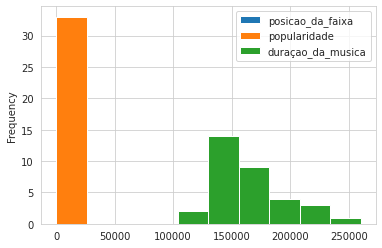

In [143]:
df.plot(kind='hist')

Explicar sobre outliers de acordo com anotações do caderno. Falar sobre o calculo feito para identificar a presença de outliers (IQR * 1.5...), junto com o grafico de boxplot pra visualizar outliers.

Artigo que tbm fala sobre outliers = https://r4ds.had.co.nz/exploratory-data-analysis.html

## **Exploração e Visualização de dados**

contexto... Toda exploração de dados está relacionada a hipoteses,  avaliar pressupostos sobre os quais a inferencia estatistica se baseara....

A EDA é um ciclo iterativo. Vocês:

* Gera perguntas sobre seus dados.

* Pesquisa respostas visualizando, transformando e modelando seus dados.

* Usa o que aprendeu para refinar suas perguntas e / ou gerar novas perguntas.

Artigo: https://r4ds.had.co.nz/exploratory-data-analysis.html

Fazer uma exploração sempre temos que ter como objetivo ir atrás de **Perguntas** e **Hipoteses**

Então vamos definir algumas perguntas que queremos responder na analise exploratoria dos dados, para reter informações... A análise exploratoria deve se chegar ao fim, quando for identificado que já se atingiu o objetivo desejado,, na prática isso é definido pela área de negocios.

### **Perguntas:**

* Qual é a música mais popular de Nexo?
* Qual é o álbum mais popular?
* E o single?
* Quantas musicas todos os albuns tem?
* A popularidade das músicas tem relação com a posição?

### **Hipóteses:**

* No album Real Plug, ...
* No album Trap de Cria, acredito que seja OI Fake 
* No album TFF, acredito que seja Match, por mais que a minha preferida seja ...

* Musica mais pouplar, Ratatah 
* Album mais popular, TFF
* **O sucesso Trap de cria**


contexto... Durante a analise exploratoria podem surgir outras perguntas, então é sempre bom começar com perguntas simple e ir aumentando suas complexidades conforme vai conhecendo os dados, o qual também é um dos objetivos da analise exploratoria, você tomar conhecimento dos seus dados.

Vamos começar visualizando novamente nosso dataframe...

In [144]:
df.head()

,nome_do_album,nome_da_faixa,posicao_da_faixa,popularidade,duraçao_da_musica
0,Trap from Future,Vem No Tum Tum,1,17,216917
1,Trap from Future,Drip Know Me,2,3,154646
2,Trap from Future,Match,3,4,180716
3,Trap from Future,Trap & Brega,4,6,164468
4,Trap from Future,Marca Sem Roupa,5,6,148364


### **Q1: Quais músicas dos albumns de NexoAnexo estão popular no momento?** Data = 

Sem contar os singles, aqui estamos levando em consideração as musicas dos albumns...

A popularidade das musicas podem mudar diariamente de acordo com os lançamentos de novas músicas que surgem, as musicas que estão popular no momento sao:

In [145]:
df[['nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,popularidade
0,Vem No Tum Tum,17
1,Trap de Cria,9
2,Trap & Brega,6
3,Marca Sem Roupa,6
4,Fogo No Incenso,5
5,Isso Que É Foda,4
6,2020,4
7,Match,4
8,Wow!,3
9,Como Tem Que Ser,3


**Visualização de dados**

A etapa de visualizacao de dados está dentro da exploração de dados, com o objetivo de transmitir a informação retiradas dos dados... Contexto

contexto sobre visualizacao de dados

Então a primeira coisa que vamos visualizar é a primeira pergunta que foi levantada, quais são as músicas que estão popular no momento?...

In [146]:
#pegar as 10 músicas que estão popular e transformar em uma variavel para plotar posteriormente
musicas_populares = df[['nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)[:20]

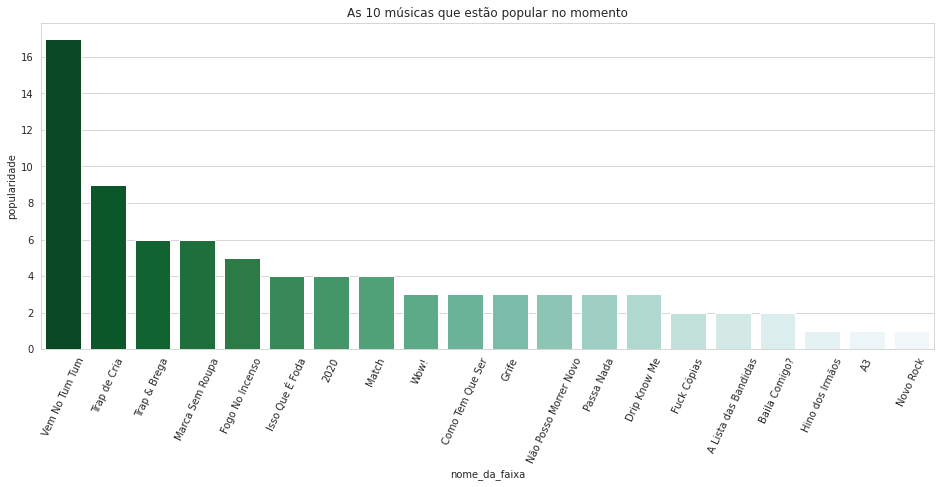

In [147]:
#plotar gráfico de barras com seaborn das músicas que estão popular
plt.figure(figsize=(16,6))
ax = sns.barplot(x= 'nome_da_faixa', 
                 y = 'popularidade', 
                 data = musicas_populares, 
                 palette = sns.color_palette("BuGn_r", n_colors=len(musicas_populares)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
ax.set_title('As 10 músicas que estão popular no momento');


O que me surpreende nessa primeira visão é a faixa Trap de Cria, que foi um lançamento do album Trap de Cria Mixtape, antes do Trap From Future. Mas não é só isso que dá pra observar, a faixa 2020 do primeiro albúm Real Plug Mix Tape está a frente de muitas da musicas do recente album Trap From Future. 

Um questionamento que tenho é se a popularidade dessas faixas que estão em alta tem relação com a posição das faixas. Tendo em vista, que a primeira faixa sempre é a primeira a tocar obviamente, sempre que inicia a playlist. Mas antes disso vamos separar os albuns por variveis para a analise ficar mais clara e facil.

**Definindo por albumns**

In [148]:
rmx = df.query("nome_do_album == 'Real Plug Mixtape' ")

In [149]:
tcm = df.query("nome_do_album == 'Trap de Cria Mixtape' ")

In [150]:
tff = df.query("nome_do_album == 'Trap from Future' ")

contexto

### **Q2: Quantidade de musicas que estão sendo analisadas?**

In [151]:
print(f'Total de músicas: {df["nome_da_faixa"].count()} músicas') 

Total de músicas: 33 músicas


**Músicas por albúm**

**Albúm Real Plug Mix Tape:**

contexto

In [152]:
print(f'O albúm tem: {rmx["nome_da_faixa"].count()} faixas')

rmx[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

O albúm tem: 8 faixas


,posicao_da_faixa,nome_da_faixa
0,1,The Train
1,2,Fica Bem
2,3,Gospel
3,4,Nxanx
4,5,Tudo
5,6,A Lei
6,7,Dreams Cup
7,8,2020


contexto

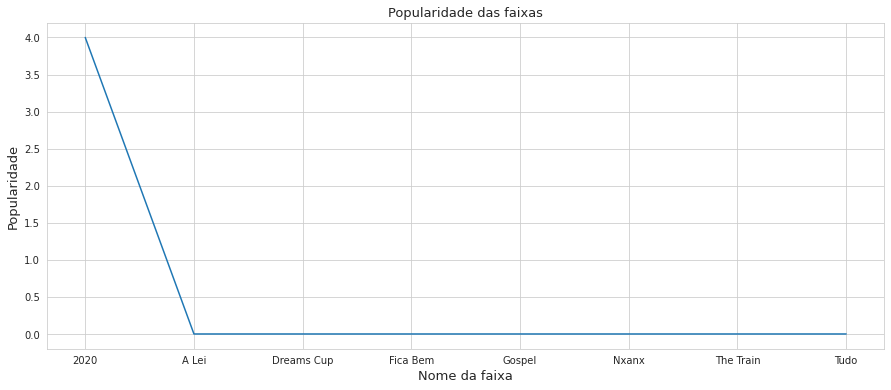

In [153]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=rmx);
ax.set_title('Popularidade das faixas', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);


Já conseguimos observar aqui que de fato a faixa 2020 é um sucesso, tendo em vista que tem uma popularidade alta mesmo estando na ultima posicao do album. 

O fato de a popularidade das outras faixas estarem baixas são devido que esse album é o mais antigo e o calculo da popularidade é feito a partir....

contexto

**Albúm Trap de cria:**

contexto

In [154]:
tcm[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

,posicao_da_faixa,nome_da_faixa
0,1,Trap de Cria
1,2,A Lista das Bandidas
2,3,A3
3,4,E Ai Fake
4,5,Video Call
5,6,Aliviando o Stress
6,7,Hino dos Irmãos
7,8,Bebê da Cara de Mal
8,9,Isso Que É Foda
9,10,Pjl


contexto

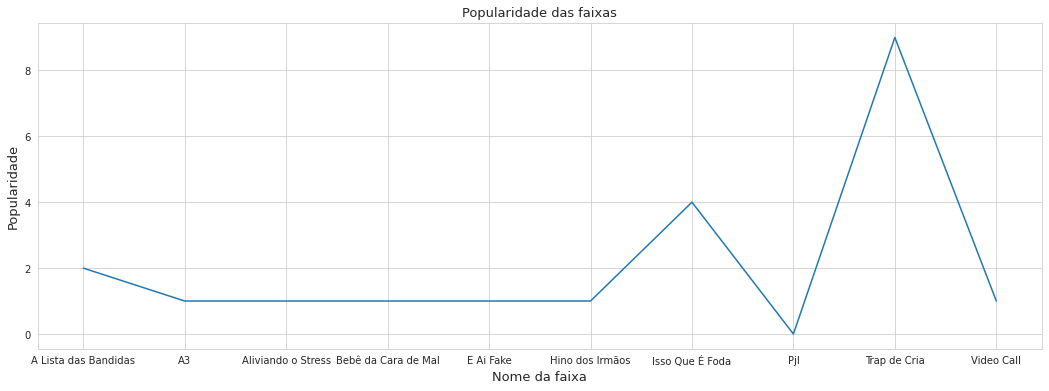

In [155]:
plt.figure(figsize=(18,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=tcm);
ax.set_title('Popularidade das faixas', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);


contexto

**Trap from future:**

contexto

In [156]:
tff[['posicao_da_faixa', 'nome_da_faixa']]

,posicao_da_faixa,nome_da_faixa
0,1,Vem No Tum Tum
1,2,Drip Know Me
2,3,Match
3,4,Trap & Brega
4,5,Marca Sem Roupa
5,6,Wow!
6,7,Não Posso Morrer Novo
7,8,Fuck Cópias
8,9,Passa Nada
9,10,Novo Rock


contexto... Trap from future é o album mais recente, coseguentemente ira apresentar uma popularidade maior em outras faixas.

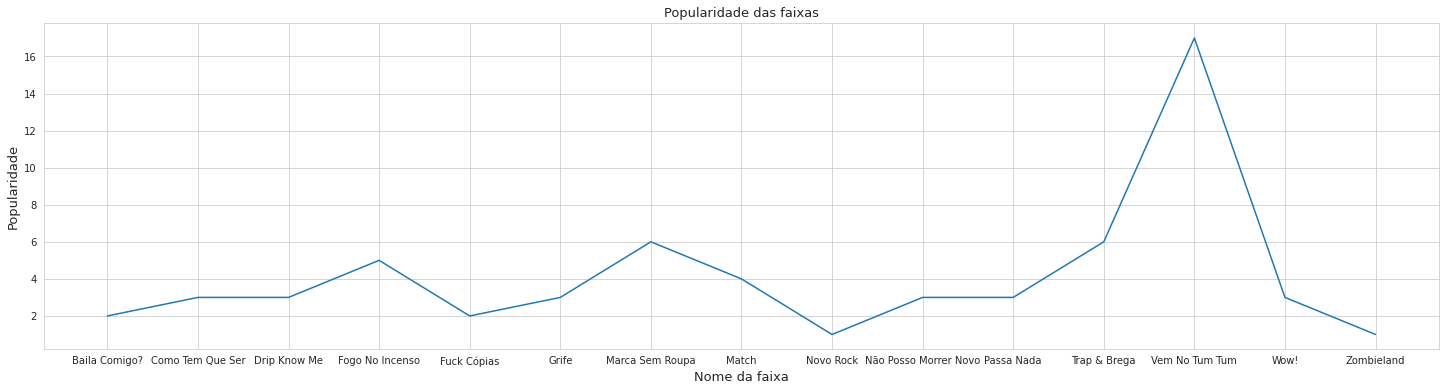

In [157]:
plt.figure(figsize=(25,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=tff);
ax.set_title('Popularidade das faixas', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);

contexto

### **Q3: Verificando se a popularidade das faixas tem relação com sua posição**

contexto

**Trap From Future**

In [158]:
tff[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,Vem No Tum Tum,1,17
1,Trap & Brega,4,6
2,Marca Sem Roupa,5,6
3,Fogo No Incenso,13,5
4,Match,3,4
5,Drip Know Me,2,3
6,Wow!,6,3
7,Não Posso Morrer Novo,7,3
8,Passa Nada,9,3
9,Como Tem Que Ser,11,3


A primeira faixa é a mais popular, mas sei que a primeira faixa é sempre a primeira a tocar numa playlist do spotify e nem sempre é a que você mais ouve, mas ela torna-se a mais ouvida por sempre que inicia a playlist ela é a primeira a tocar.

Isso também pode ser aplicado aqui, por que se a posição tivesse relação com a popularidade as outras faixas seguintes também deveriam continuar sendo as mais populosas, que não acontece..

contexto, particulamente curto muito a musica Novo Rock com uma pegada diferente e faz lembrar o estilo bate cabeça

contexto

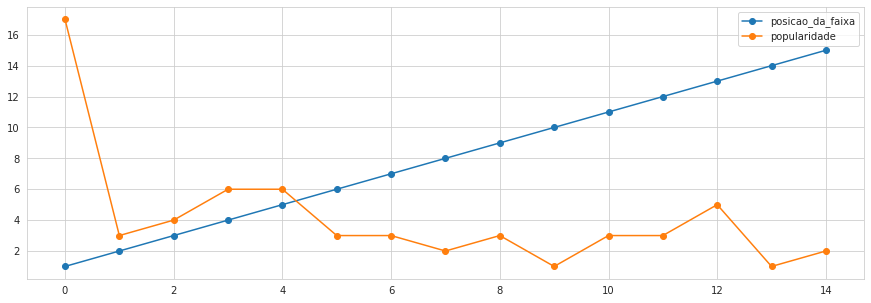

In [159]:
dados = tff[['posicao_da_faixa','popularidade']]

fig, ax = plt.subplots(figsize = (15,5))

dados.plot(kind='line', marker='o', ax=ax)
plt.show()


Com esse gráfico é possivel observar que a popularidade das faixas tem uma crescente da posição 1 a 4, lembre-se que o gráfico esta representado pelo index, ou seja, a posição 1 começa a partir do 0, mas depois a popularidade descrece de acordo com a posição da faixa....

contexto

**Albúm real plug mix tape**

In [160]:
rmx[['nome_da_faixa','posicao_da_faixa', 'popularidade']].reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,The Train,1,0
1,Fica Bem,2,0
2,Gospel,3,0
3,Nxanx,4,0
4,Tudo,5,0
5,A Lei,6,0
6,Dreams Cup,7,0
7,2020,8,4


Como dito anteriormente é possivel observar que a faixa 2020 é de fato um sucesso, por que se analisarmos as musicas que estão na ultima posição de cada album, em sua maioria são as menos ouvidas.

É incrivel como 2020 ainda possui um alcance grande, mesmo que a popularidade esteja pequena, é uma musica que está a frente de grandes faixas do recente album lançado, tff, como a faixa Wow.

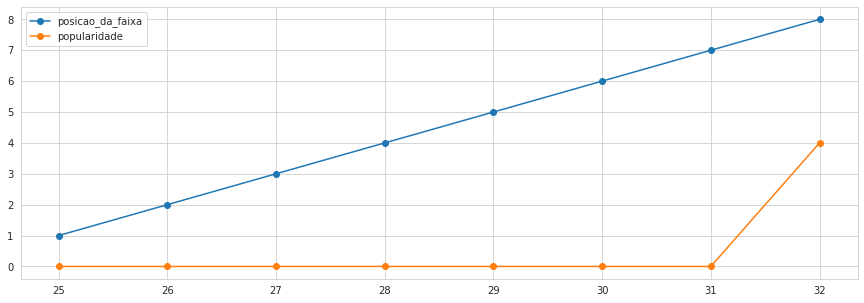

In [161]:
dados = rmx[['posicao_da_faixa','popularidade']]

fig, ax = plt.subplots(figsize = (15,5))

dados.plot(kind='line', marker='o', ax=ax)
plt.show()

Nesse albúm é possivel observar claramente que quando uma faixa é um sucesso a ordem não importa, e por ser o primeiro albúm do artista, é o menos ouvido atualmente e sua unica musica que esta popular no momento é a faixa 2020 que se encontra na ultima posição.

contexto

**Albúm trap de cria**

In [162]:
tcm[['nome_da_faixa','posicao_da_faixa', 'popularidade']].reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,Trap de Cria,1,9
1,A Lista das Bandidas,2,2
2,A3,3,1
3,E Ai Fake,4,1
4,Video Call,5,1
5,Aliviando o Stress,6,1
6,Hino dos Irmãos,7,1
7,Bebê da Cara de Mal,8,1
8,Isso Que É Foda,9,4
9,Pjl,10,0


Assim como no album TFF, a musica mais popular deste album é a que está na primeira posição, vale resaltar que a musica Trap de cria é a musica mais popular de todos os albuns, como foi visto anteriormente.

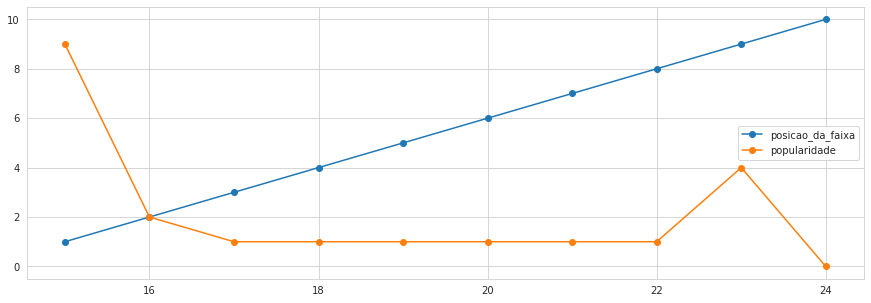

In [163]:
dados = tcm[['posicao_da_faixa','popularidade']]

fig, ax = plt.subplots(figsize = (15,5))

dados.plot(kind='line', marker='o', ax=ax)
plt.show()

contexto

contexto... O que fica claro é que a popularidade das faixas só tem relação com a posição para a primeira música de cada albúm, devido ao que foi explicado...

Ainda podemos fazer uma correlção da popularidade com a posição das faixas para comprovar se realmente a posição da faixa não tem relação com a popularidade. Aplicando o metodo de correlação de estatistica multivariada.

**Correlação (Estatística Multivariada)**

contexto

In [164]:
df[['posicao_da_faixa', 'popularidade']].corr(method='spearman')

,posicao_da_faixa,popularidade
posicao_da_faixa,1.000000,0.034384
popularidade,0.034384,1.000000


Contexto sobre os metodos de correlação/correlação e estatistica multivariada..

Usamos o metodo spearman de correlação, um dos mais  famosos.... 

Nota-se que existe uma correlação muito fraca da posição da faixa com a popularidade

E se usarmos o outro metodo.. também um dos mais famosos, o metodo....

In [165]:
df[['posicao_da_faixa', 'popularidade']].corr(method='')

ValueError: ignored

contexto

### **Q5: Qual a classificação da popularidade?**

Agora vou investigar mais essa coluna da popularidade para buscar algumas informações aplicando metodos estatisticos.

Primeiro vamos observar um resumo estatistico dos dados...

In [ ]:
df['popularidade'].describe()

contexto... A popularidade mais alta é 17 e a menor é 0 ....

Agora irei aplicar estatistica descritiva univariada para explorar mais a coluna popularidade...

### **Aplicando estatistica descritiva univariada**

contexto... Sobre estatistica descritiva univariada

### **Q6: Qual a media de popularidade?**

contexto.. Media de todos os albuns

Contexto falar um pouco sobre a media...O calculo da média é feito de forma que... FOTO DA FUNÇÃO

In [ ]:
df['popularidade'].mean()

contexto

### **Q7: Qual a média da popularidade por albúm?**

In [ ]:
media_popularidade = df.groupby('nome_do_album')['popularidade'].mean().reset_index().sort_values(ascending=False, by='popularidade')
media_popularidade 

contexto... Album TFF com popularidade acima da media, isso se da devido que é o album mais recente...

Agora irei aplicar um pouco de engenharia de recursos e criar uma nova coluna de acordo com a popularidade...

### **Construindo uma nova coluna de acordo com a media da popularidade**

É importante construir novas colunas ou novos recursos, por criar outras maneiras de utilizar os dados.... Contexto (Engenharia de Recursos)

In [ ]:
df['popularidade_por_faixa'] = ['Alta' if x > 2.60 else 'Baixo' for x in df['popularidade']]

Se a faixa estiver com uma popularidade acima de 2.60, está com a popularidade alta, tendo em vista que a media da popularidade é 2.60.

Lembrar de alterar isso de acordo com a media atual....

In [ ]:
df.head()

A partir da construção dessa nova coluna podemos trabalhar e usar mais os nossos dados, que é o objetivo da engenharia de recursos, de forma que a partir dessa nova coluna surgem mais perguntas.

Por isso é sempre bom começar com perguntas simples e ir aumentando suas complexidades conforme vai conhecendo e explorandos os dados...

### **Q8: Quantas faixas estão em alta?**

In [ ]:
df['popularidade_por_faixa'].value_counts()

contexto

### **Q9: Quais são as faixas que estão popular no momento?**

In [ ]:
df.query("popularidade_por_faixa == 'Alta'").sort_values(ascending=False, by='popularidade').reset_index()[['nome_do_album', 'nome_da_faixa', 'popularidade', 'popularidade_por_faixa']]

contexto

### **Q10: Quantas faixas que estão em alta não estão na primeira posição do albúm?**

contexto

In [ ]:
df.query("popularidade_por_faixa == 'Alta' & posicao_da_faixa != '1' ").sort_values(ascending=False, by='popularidade').reset_index()[['nome_do_album', 'nome_da_faixa', 'posicao_da_faixa', 'popularidade', 'popularidade_por_faixa']]

Ou seja mais da metade das faixas que estão em alta não estão na primeira posição do albúm... Comprovando o que observamos que a posicao da faixa não tem relação com a popularidade...

### **Aplicando um pouco mais de estatistica descritiva univariada**

contexto... Já aplicamos um pouco de estatistica descritiva univariada quando visualizamos a média da popularidade das faixas, agora vamos aplicar outros metodos estatisticos...

**contruir BONS GRAFICOS para cada metodo estatistico de acordo com os estudos E FALAR MAIS SOBRE ESTATISTICA, ESPECIFICAMENTE TESTE DE HIPOTESE**

contexto

**Mediana**

contexto sobre mediana

In [ ]:
df.median()

**Moda**

contexto sobre mode

In [ ]:
df.mode()

**Desvio padrão**

contexto sobre desvio padrao

In [ ]:
#desvio padrao
df.std()

**Box plot**

contexto sobre box plot....

In [ ]:
#box plot

sns.boxplot(y='nome_da_faixa', x='popularidade', data=tff)

**Assimetria**

contexto sobre assimetria...

In [ ]:
#Assimetria

df.skew()

**Kurtossis**

contexto sobre kurtose...

In [ ]:
#Kurtose
df.kurt()

A exploração dos dados deve chegar ao fim quando o pessoal da área de negocios se sentirem satisfeitos ou quando os objetivos das informações retiradas dos dados forem alcançados.....

### **Perguntas e hipoteses respondidas na analise exploratoria de dados:**

* Q1 = 
* Q2 = 
* Q3 = 

##**Gravar arquivo XLSX para criar dashboard**

Vamos agora gravar o nosso arquivo no formato CSV para criar a nossa aplicação/dashboard com Python.

In [ ]:
dataset.to_csv('NexoAnexo')

## **Construindo Aplicação/Dashboard com Python + Deploy com Heroku**

### **Aplicação com streamlit**

Explicar streamlit, framework do python excelente para construir dashboard de visualização de dados....

### **Colocar disponivel com Heroku**

Ensinar os passos a passos para colocar a aplicação no ar com heroku: 

https://medium.com/@gustavo_domingues/como-fazer-deploy-de-sua-aplica%C3%A7%C3%A3o-streamlit-no-heroku-5fc1d2609df7#:~:text=email%40dominio.com-,Deploy,site%2C%20ent%C3%A3o%20escolha%20algo%20legal.&text=Sempre%20que%20quiser%20atualizar%20ou,basta%20seguir%20os%20passos%20abaixo.

https://www.youtube.com/watch?v=mQ7rGcE766k&list=WL&index=2&t=0s




contexto

## **Como ajuda o negócio?**